# Group 20

Null Hypothesis (H0): There is no difference in the improvement of mortality rates between male and female genders over time. 

Alternative Hypothesis (H1): There is a difference in the improvement of mortality rates between male and female genders over time. 

In [36]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import shapiro


In [37]:
df=pd.read_csv('original.csv')
df

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000"
0,AFG,Afghanistan,1970,0-6 days,Male,"19,241","318,292.90"
1,AFG,Afghanistan,1970,0-6 days,Female,"12,600","219,544.20"
2,AFG,Afghanistan,1970,0-6 days,Both,"31,840","270,200.70"
3,AFG,Afghanistan,1970,7-27 days,Male,"15,939","92,701.00"
4,AFG,Afghanistan,1970,7-27 days,Female,"11,287","68,594.50"
...,...,...,...,...,...,...,...
58900,ZWE,Zimbabwe,2010,80+ years,Female,"7,606","16,179.40"
58901,ZWE,Zimbabwe,2010,80+ years,Both,"13,305","16,633.80"
58902,ZWE,Zimbabwe,2010,All ages,Male,"82,010","1,320.10"
58903,ZWE,Zimbabwe,2010,All ages,Female,"77,420","1,211.20"


In [38]:
# Inspect non-null counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58905 entries, 0 to 58904
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country Code            58905 non-null  object
 1   Country Name            58905 non-null  object
 2   Year                    58905 non-null  int64 
 3   Age Group               58905 non-null  object
 4   Sex                     58905 non-null  object
 5   Number of Deaths        58905 non-null  object
 6   Death Rate Per 100,000  58905 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.1+ MB


In [39]:
# Identify missing values explicitly
missing_values_count = df.isnull().sum()
print("Missing values per column:\n", missing_values_count)

Missing values per column:
 Country Code              0
Country Name              0
Year                      0
Age Group                 0
Sex                       0
Number of Deaths          0
Death Rate Per 100,000    0
dtype: int64


In [40]:
# Identify columns that are of type 'object', which typically represents strings
string_columns = df.select_dtypes(include=['object']).columns

print("Columns that are strings:")
print(string_columns)

Columns that are strings:
Index(['Country Code', 'Country Name', 'Age Group', 'Sex', 'Number of Deaths',
       'Death Rate Per 100,000'],
      dtype='object')


In [41]:
# Convert "Number of Deaths" and "Death Rate Per 100,000" to numeric
df['Number of Deaths'] = df['Number of Deaths'].str.replace(',', '').astype(float)
df['Death Rate Per 100,000'] = df['Death Rate Per 100,000'].str.replace(',', '').astype(float)

# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Remove duplicates
df = df.drop_duplicates()

# Check for any missing or placeholder values in object columns
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{column}':", df[column].unique()[:5])  # Display first 5 unique values for brevity

# Display the first few rows to verify changes
df.head()

Unique values in 'country_code': ['AFG' 'AGO' 'ALB' 'AND' 'ARE']
Unique values in 'country_name': ['Afghanistan' 'Angola' 'Albania' 'Andorra' 'United Arab Emirates']
Unique values in 'age_group': ['0-6 days' '7-27 days' '28-364 days' '1-4 years' '5-9 years']
Unique values in 'sex': ['Male' 'Female' 'Both']


,country_code,country_name,year,age_group,sex,number_of_deaths,"death_rate_per_100,000"
0,AFG,Afghanistan,1970,0-6 days,Male,19241.0,318292.9
1,AFG,Afghanistan,1970,0-6 days,Female,12600.0,219544.2
2,AFG,Afghanistan,1970,0-6 days,Both,31840.0,270200.7
3,AFG,Afghanistan,1970,7-27 days,Male,15939.0,92701.0
4,AFG,Afghanistan,1970,7-27 days,Female,11287.0,68594.5


To test the hypotheses regarding the difference in the improvement of mortality rates between male and female genders over time, we can use statistical tests. Since our hypotheses compare two groups over time, a common approach would be to use a longitudinal analysis method.

In [42]:
df.columns

Index(['country_code', 'country_name', 'year', 'age_group', 'sex',
       'number_of_deaths', 'death_rate_per_100,000'],
      dtype='object')

In [43]:
# Step 1: Aggregate the data
agg_data = df.groupby(['year', 'sex'])['death_rate_per_100,000'].mean().reset_index()

In [44]:
# Step 2: Prepare data for analysis
# Split the aggregated data into two groups: male and female
male_rates = agg_data[agg_data['sex'] == 'Male']['death_rate_per_100,000']
female_rates = agg_data[agg_data['sex'] == 'Female']['death_rate_per_100,000']

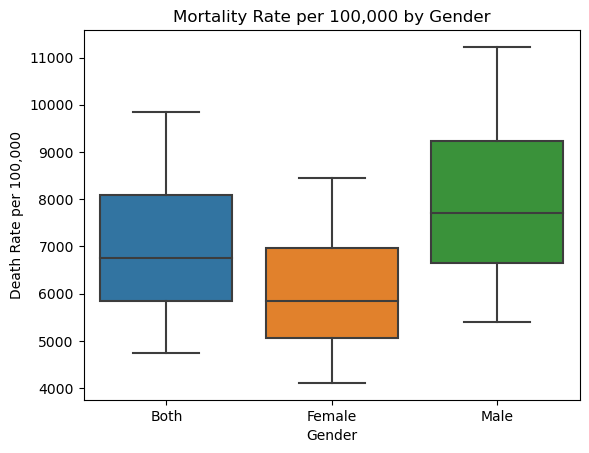

In [50]:
sns.boxplot(x='sex', y='death_rate_per_100,000', data=agg_data)
plt.title('Mortality Rate per 100,000 by Gender')
plt.ylabel('Death Rate per 100,000')
plt.xlabel('Gender')
plt.show()

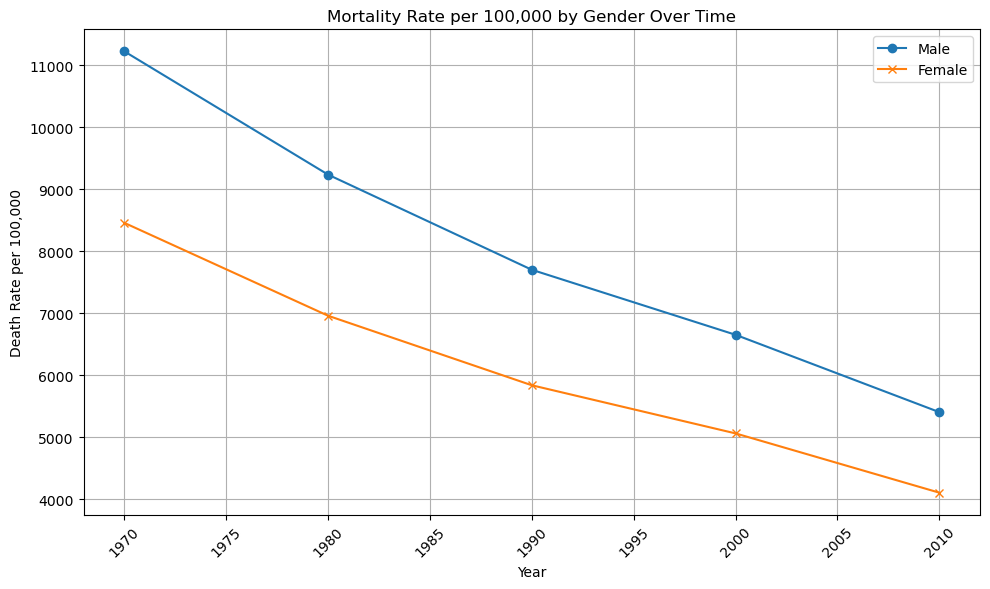

In [45]:
# Filtering aggregated data for male and female
male_rates = agg_data[agg_data['sex'] == 'Male']
female_rates = agg_data[agg_data['sex'] == 'Female']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(male_rates['year'], male_rates['death_rate_per_100,000'], label='Male', marker='o')
plt.plot(female_rates['year'], female_rates['death_rate_per_100,000'], label='Female', marker='x')

plt.title('Mortality Rate per 100,000 by Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Death Rate per 100,000')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels

plt.show()

In [49]:
# Ensure you're selecting only the 'death_rate_per_100,000' column for each gender
male_rates_numeric = male_rates['death_rate_per_100,000'].astype(float)  # Convert to float if not already
female_rates_numeric = female_rates['death_rate_per_100,000'].astype(float)  # Convert to float if not already

# Now, perform the t-test with these corrected variables
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(male_rates_numeric, female_rates_numeric)

# Print the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 1.549555399807348, P-value: 0.15984252547250033


 P-value: 0.15984252547250033: The p-value is greater than 0.05. This means there is not enough evidence to reject the null hypothesis at the 5% significance level.
 
 In other words, the data does not provide strong enough evidence to conclude that there is a significant difference in the improvement of mortality rates between male and female genders over time.
 
 